# Problemas de variables aleatorias (versión Python)

Conversión del documento original en R a un cuaderno de Jupyter con enunciados en Markdown y soluciones en Python.

Este notebook usa:

```python
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from collections import Counter
from scipy.special import comb
```

Las funciones de probabilidad/distribución se implementan con fórmulas básicas (sin usar librerías externas como `scipy`) para que el código sea lo más transparente posible.


In [165]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

### Antes de ejecutar esto, es necesario hacer 
## pip install empiricaldist 
## en Terminal
from empiricaldist import Pmf


## Recordatorio: Variable aleatoria geométrica

Sea $0 < p < 1$. Diremos que $X \sim \operatorname{Geom}(p)$ (forma *número de fracasos antes del primer éxito*) si

\begin{align*}
  \operatorname{P}(X = k) &= q^k p, \quad k = 0,1,2,\dots,\\
q &= 1-p,\\
 \operatorname{E}(X) &= \frac{1-p}{p},\\
\operatorname{Var}(X) &= \frac{1-p}{p^2}.
\end{align*}

A continuación definimos funciones para la **f.d.p.**, **f.d.c.** y para simular muestras.


In [166]:
from scipy.stats import geom
X = geom(p=0.3)
muestras = X.rvs(50)
print(f"Random samples: {muestras}")

X.cdf(3)
X.mean()

Random samples: [ 2  1  4  5  1  1 10  2  4  1  2  1  3  5  1  3  8  9  3  1  4  5  2  3
 12  5  5  6  6  3  2  9  3  4  6  2  4  4  2  1  1  3 10  4  2  2  1  5
  1  9]


3.3333333333333335

In [167]:
X.pmf(3)

0.14699999999999996

In [168]:
X.cdf(3)

0.6569999999999999

In [169]:
X.ppf(0.3)

1.0

In [170]:
X.mean()

3.3333333333333335

In [171]:
X.var()

7.777777777777779

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


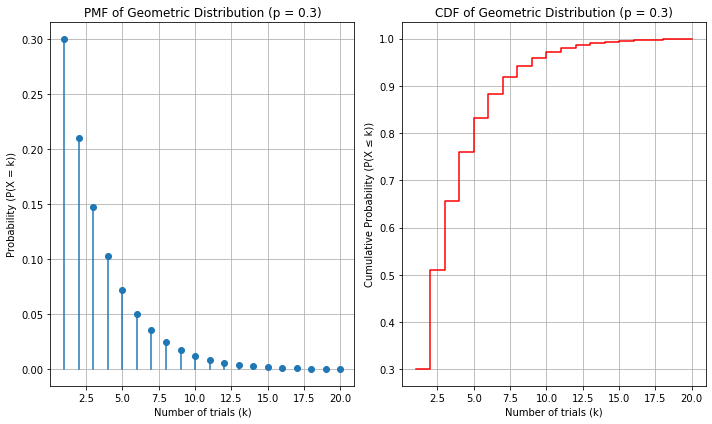

In [172]:
k_values = np.arange(1, 21)  # k = 1 to 20 (number of trials)

# PMF: Probability of having exactly k trials before the first success
pmf_values = X.pmf(k_values)

# CDF: Probability of having k or fewer trials before the first success
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(10, 6))

# Plot the PMF
plt.subplot(1, 2, 1) ## 1 fila, 2 columnas, primer elemento de la fila
plt.stem(k_values, pmf_values, basefmt=" ")
plt.title("PMF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot the CDF
plt.subplot(1, 2, 2) ## 1 fila, 2 columnas, segundo elemento de la fila
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title("CDF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

## Recordatorio: Variable aleatoria binomial

Sea $0 < p < 1$ y $N \ge 1$. Diremos que $X \sim \operatorname{Binom}(N,p)$ si

\begin{align*}
\mathbb P(X = k) &= {N \choose k} p^k (1-p)^{N-k}, \quad k = 0,\dots,N,\\
\mathbb E(X) &= Np,\\
\operatorname{Var}(X) &= Np(1-p).
\end{align*}

Implementamos las funciones básicas análogas a `dbinom`, `pbinom`, `qbinom` y `rbinom`.


## Recordatorio: Variable aleatoria de Poisson

Sea $\lambda > 0$. Diremos que $X \sim \operatorname{Pois}(\lambda)$ si

\begin{align*}
\mathbb P(X = k) &= e^{-\lambda} \dfrac{\lambda^k}{k!}, \quad k = 0,1,2,\dots,\\
\mathbb E(X) &= \lambda,\\
\operatorname{Var}(X) &= \lambda.
\end{align*}


<font color='blue'><strong> 

3. Una persona llega a una estación de tren. Los trenes salen cada 10 minutos. El tiempo entre su llegada y la partida del siguiente tren se distribuye uniformemente en $[0,10]$ minutos.

Sea $X =$ «Tiempo de espera hasta salir en tren».

1. Analiza la variable.
2. Calcula $\mathbb P(X > 4)$.
3. Calcula la probabilidad de que, entre 5 días tomados al azar, en **al menos 2** de ellos haya esperado menos de 4 minutos.
    </strong> </font> 

<h3> Solución. </h3>

 * Se trata, obviamente, de una variable uniforme (continua) en el intervalo [0,10], $X\sim \operatorname{Unif}([0,10])$. 
 
 * Por tanto, 
 
 $$P[X>4]= 1-P(X\leq 4)= 1-4/10 =6/10.$$


In [173]:
6/10


0.6

Resppondemos ahora al apartado siguiente: <font color='blue'> <strong> c. Calcular la probabilidad de que entre cinco días tomados al azar, en al menos dos de ellos haya tenido que esperar menos de 4 minutos.</strong></font>


Aquí la variable a considerar es $Y=$ ``Número de días que espero menos de 4 minutos'' (sabiendo que el experimento lo repetimos 5 veces). Se trata de una binomial $Y\sim Binom(5,p)$ donde $p=P(X\leq 4)=4/10$. Queremos calcular 
\begin{eqnarray*}
    P(Y\geq 2)&=& 1-P(Y<2)\\
    &=& 1-P(Y\leq 1)\\
    &=& 1-P(Y=0)-P(Y=1)\\
    &=& 1-\binom{5}{0}(1-p)^5-\binom{5}{1}p(1-p)^4
\end{eqnarray*}
  

In [174]:
from scipy.stats import binom
import matplotlib.pyplot as plt
p=4/10
Y=binom(5,p)
solucion=1-Y.cdf(1)
solucion

0.6630400000000001


<font color='blue'> <strong> 4. Las campanas de la catedral de Murcia suenan cada 15 minutos. Suponiendo que una persona pasa todos los días por la plaza del Cardenal Belluga en un momento totalmente aleatorio, ¿cuál será la función de densidad de la variable aleatoria X =
‘tiempo de espera hasta que suenen las campanas’? ¿Cuál será la probabilidad de que la persona se tuviera que esperar entre 5 y 10 minutos? ¿Cuál será el tiempo medio de espera?</strong> </font>



 La variable es uniforme $X\sim \operatorname{Unif}([0,15])$. Su función de densidad es 
$$
f(x)= \left\{\begin{array}{lll} 1/15 & si\ 0\leq x\leq 15 \\ 0 & otro\ caso \end{array}\right.
$$
La probabilidad que nos piden es $$P(5\leq X\leq 10)=\int_5^{10} f(x)dx=5/15=1/3.$$
El tiempo medio de espera es
$$\mu=\int_0^{15} xf(x)dx=5/15=1/3=\int_0^{15} \frac{x}{15}dx=\frac{1}{15} \frac{15^2}{2}=\frac{15}{2}=7.5 $$

In [175]:
from scipy.stats import uniform
X=uniform(0,15)
solucion=X.mean()
solucion

7.5

<text><font color='blue'> <strong> 5. Los tiempos en un proceso industrial se distribuyen aleatoriamente entre 20 y 40 minutos. Sea X =’Tiempo de un proceso’. Analiza la variable. Calcular la
probabilidad de que un proceso elegido al azar tarde menos de 25 minutos.</strong> </font>



La variable es uniforme $X\sim \operatorname{Unif}([20,40])$. Su función de densidad es 
$$
f(x)= \left\{\begin{array}{lll} 1/20 & si\ 20\leq x\leq 40 \\ 0 & otro\ caso \end{array}\right.
$$
La probabilidad que nos piden es $$P(20\leq X\leq 25)=\int_{20}^{25} f(x)dx=5/20=1/4.$$

In [176]:
from scipy.stats import uniform

X = uniform(loc=20, scale=40-20)
solucion = X.cdf(25) - X.cdf(20)
solucion

0.25

<font color='blue'> <strong> 6. Un lenguaje de programación tiene una función random() que proporciona
números aleatorios entre 0 y 10. Saco un número y me interesa  X = ‘Número sacado’.  Analiza la variable. Si saco dos números calcula la probabilidad de que uno de los dos sea mayor que 8.</strong> </font>

<h3> Solución.</h3>

Aquí el problema está formulado de manera ambigua: no nos dicen si el número es real (i.e., cualquiera del intervalo [0,10]) -en cuyo caso la v.a. es continua uniforme $X\sim {\rm Unif}([0,10])$; o si el número es un entero -en cuyo caso es una v.a. discreta uniforme. Por otra parte, cuando el problema dice que ''uno de los dos'' sea mayor que 8, no aclara si es ''exactamente uno'' o si quiere decir ''al menos uno''. Vamos a asumir la segunda posibilidad (es decir, que pregunta por la probabilidad de que al menos uno de los dos sea mayor que 8) y vamos a responder en ambos casos (continuo y discreto). 

<strong> Caso 1: La v.a. es continua.</strong>  Se trata, por tanto, de $X\sim Unif([0,10])$. Recordemos que si $X\sim Unif([0,10])$ entonces 
$E(X)=\frac{a+b}{2}$ y $V(X)=\frac{(b-a)^2}{12}$. Por tanto, 
Entonces su media es $5$, su desviación típica es $\sqrt{100/12}$.

In [177]:
(100/12)**0.5

2.886751345948129

Ahora consideremos que sacamos dos números $X_1,X_2$. Evidentemente, las tiradas las asumimos independientes. Entonces 


\begin{eqnarray*}
    &\ & P(\{X_1>8\}\cup \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\}\cap \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\})P(\{X_2>8\})\\
    &=& 2/10+2/10-(2/10)^2
\end{eqnarray*} 



In [178]:
2/10+2/10-(2/10)**2

0.36

Nota: Obsérvese que en este caso, la probabilidad no cambia si cambiamos $>8$ por $\geq 8$. 

<strong> Caso 2: La v.a. es discreta.</strong>  Entonces $X$ es uniforme en el conjunto: 
        $$\{0,1,2,3,4,5,6,7,8,9,10\}$$

In [179]:
val=np.array([0,1,2,3,4,5,6,7,8,9,10])
val

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

Por lo que las probabilidades son:

In [180]:
prob=np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])
prob

array([0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909, 0.09090909, 0.09090909, 0.09090909, 0.09090909,
       0.09090909])

Con esta información podemos definir su función densidad de probabilidad:

In [181]:
def f(x):
    return np.sum(prob[val == x])

In [182]:
f_vec = np.vectorize(f)

In [183]:
# Definimos la función F(x) que calcula la suma acumulada de probabilidades hasta x
def F(x):
    return np.sum(prob[val <= x])

# Vectorize the function F for the entire val range
F_vec = np.vectorize(F)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


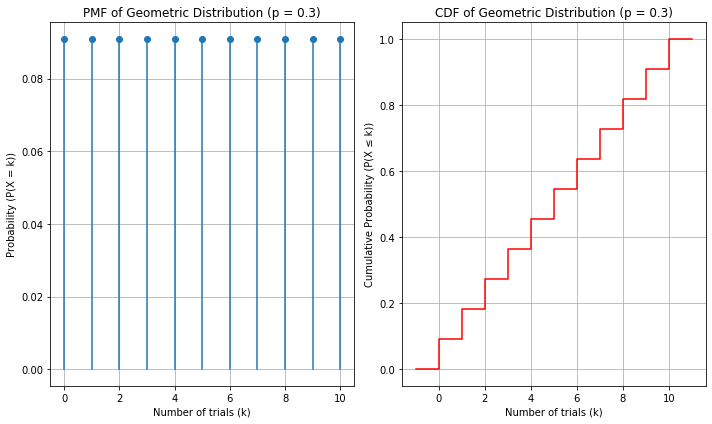

In [184]:
# Dibujamos la densidad de probabilidad (PMF) y la función de distribución (probabilidad acumulada (CDF))
plt.figure(figsize=(10, 6))

# Plot de la  PMF
plt.subplot(1, 2, 1)
plt.stem(val, f_vec(val), basefmt=" ")
plt.title("PMF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot de la CDF
plt.subplot(1, 2, 2)
x_vals = np.array([min(val)-1, *val, max(val)+1])  # Auxiliary variable for extended range
plt.step(x_vals, F_vec(x_vals), where='post', color='r', linestyle='-')
plt.title("CDF of Geometric Distribution (p = 0.3)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Mostramos los gráficos:
plt.tight_layout()
plt.show()

In [185]:
# Cálculo de la media (o esperanza)
media_X = np.sum(val * f_vec(val))
print("Media :", media_X)

# Cálculo de la varianza 
var_X = np.sum((val - media_X)**2 * f_vec(val))
print("Varianza :", var_X)

# Cálculo de la desviación típica
dt_X = np.sqrt(var_X)
print("Desviación típica :", dt_X)

Media : 5.0
Varianza : 10.000000000000002
Desviación típica : 3.1622776601683795


Ahora consideremos que sacamos dos números $X_1,X_2$. Evidentemente, las tiradas las asumimos independientes. Entonces 


\begin{eqnarray*}
    &\ & P(\{X_1>8\}\cup \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\}\cap \{X_2>8\}) \\
    &=& P(\{X_1>8\})+P(\{X_2>8\})-P(\{X_1>8\})P(\{X_2>8\})\\
    &=& 2/11+2/11-(2/11)^2
\end{eqnarray*} 



In [186]:
2/11+2/11-(2/11)**2

0.3305785123966942

Obsérvese que en este caso, la probabilidad cambia si cambiamos $>8$ por $\geq 8$:


\begin{eqnarray*}
    &\ & P(\{X_1\geq 8\}\cup \{X_2\geq 8\}) \\
    &=& P(\{X_1\geq 8\})+P(\{X_2\geq 8\})-P(\{X_1\geq 8\}\cap \{X_2\geq 8\}) \\
    &=& P(\{X_1\geq 8\})+P(\{X_2\geq 8\})-P(\{X_1\geq 8\})P(\{X_2\geq 8\})\\
    &=& 3/11+3/11-(3/11)^2
\end{eqnarray*} 


In [187]:
3/11+3/11-(3/11)**2

0.47107438016528924

<font color='blue'> <strong> 7. Se tiene una cadena de 5 interruptores que pueden estar en posición 0 o 1. Sea 
$$X
= \text{``Número de interruptores en posición 1’'}.$$ Analiza la variable. ¿Cuál es la
probabilidad de que haya exactamente 3 interruptores en posición 1? </strong> </font> 

<h3> Solución.</h3>  
De nuevo la formulación del problema es ambigua porque no nos dicen con qué probabilidad está encendido/apagado  cada interruptor, y tampoco nos informan sobre posibles dependencias entre unos interruptores y otros. 

Se entiende, entonces, que: la probabilidad de encendido/apagado es la misma (es decir, 1/2) y los interruptores funcionan de forma independiente unos de otros. 

En estas condiciones, la variable $X$ es $X\sim {\rm Binom}(5,1/2)$, por lo que 


$$P(X=3)=\binom{5}{3} (1/2)^3(1/2)^{5-3}=\binom{5}{3} (1/2)^5$$

In [188]:
from scipy.stats import binom
X=binom(5,1/2)
solucion=X.pmf(3) ## Recuerda: pmd=probability mass function; En v.a. continuas se usa pdf= prob. density function
solucion

0.3125

<font color='blue'> <strong> 8. Siete de cada diez estudiantes aprueba el primer parcial de una asignatura. Se
seleccionan 8 estudiantes al azar. Sea X = ‘Número de alumnos que suspenden el
parcial’. Analiza la variable. Probabilidad de que exactamente 2 suspendan entre
    los 8 seleccionados. </strong> </font>

<h3> Solución. </h3> 
La variable $X$ es $\operatorname{Binom}(8,1-7/10)$ y nos piden $P(X=2)$

In [189]:
from scipy.stats import binom
X=binom(8,1-7/10)
solucion=X.pmf(2)
solucion

0.29647548

Vamos ahora a analizar la variable. Primero calculamos la media:

In [190]:
X.mean()

2.4000000000000004

Ahora la varianza y la desviación típica:

In [191]:
X.var()

1.6800000000000002

In [192]:
X.var()**0.5

1.2961481396815722

Ahora los cuartiles:

In [193]:
X.ppf([0.25,0.5,0.75])

array([1., 2., 3.])

Finalmente, dibujamos su función densidad de probabilidad y su distribución de probabilidad:

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


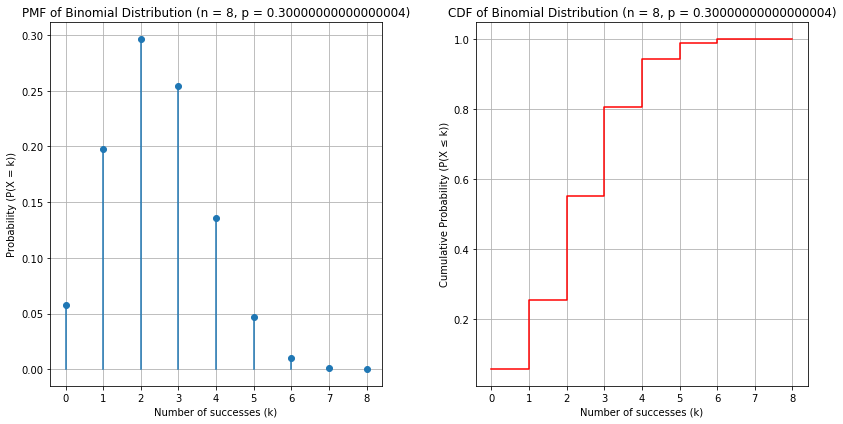

In [194]:
## Gráficos:

n = 8  # Number of trials
p = 1-7/10  # Probability of success

# Values of k (number of successes)
k_values = np.arange(0, n + 1)  # k = 0, 1, ..., n

# PMF: Probability of having exactly k successes
pmf_values = X.pmf(k_values)

# CDF: Probability of having at most k successes
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(12, 6))

# Plot the PMF
plt.subplot(1, 2, 1)
plt.stem(k_values, pmf_values, basefmt=" ")
plt.title(f"PMF of Binomial Distribution (n = {n}, p = {p})")
plt.xlabel("Number of successes (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot the CDF
plt.subplot(1, 2, 2)
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title(f"CDF of Binomial Distribution (n = {n}, p = {p})")
plt.xlabel("Number of successes (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Show the plots
plt.tight_layout()
plt.show()

<font color='magenta'> <strong> 9. Suponiendo que la probabilidad de ser niño es del $49\%$ y una familia tiene 6 hijos
sea X = ’Número de niñas’. Analiza la variable. ¿Cuál es la probabilidad de que
una familia de 6 hijos tenga 3 niños y 3 niñas? </strong> </font>


<h3> Solución. </h3>


<font color='magenta'> <strong> 10. Tiro 10 dados y me interesa el número de unos que sale. Analiza la variable.
Calcula la probabilidad de que salgan menos de dos unos. </strong> </font>


<h3> Solución. </h3>

<font color='blue'> <strong> 11. La probabilidad de aprobar una asignatura es del $35\%$. 
    Sea 
    
    X = ‘Convocatorias a las que me presento antes de aprobar’. 
    
Analiza la variable. ¿Cuál es la probabilidad de aprobar a la cuarta convocatoria? </strong> </font>



<h3> Solución. </h3>

En este caso estamos ante una variable aleatoria geométrica: 

$$X\sim \operatorname{Geom}(0.35).$$ 

Por tanto, $$P(X=k)=0.35\cdot (1-0.35)^k.$$ 


Con esta información podemos definir su función densidad de probabilidad:

In [195]:
from scipy.stats import geom
X=geom(0.35)

In [196]:
X.mean()

2.857142857142857

In [197]:
X.var()

5.306122448979593

In [198]:
X.var()**0.5

2.303502213799586

In [199]:
X.ppf([0.25,0.5,0.75])

array([1., 2., 4.])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


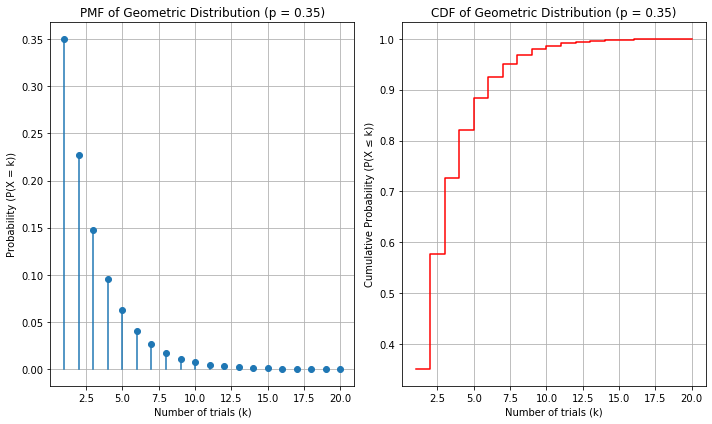

In [200]:
k_values = np.arange(1, 21)  # consideramos que dibujar las primeras 20 probabilidades basta

# PMF
pmf_values = X.pmf(k_values)

# CDF
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(10, 6))

# Plot PMF
plt.subplot(1, 2, 1) ## 1 fila, 2 columnas, primer elemento de la fila
plt.stem(k_values, pmf_values, basefmt=" ")
plt.title("PMF of Geometric Distribution (p = 0.35)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2) ## 1 fila, 2 columnas, segundo elemento de la fila
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title("CDF of Geometric Distribution (p = 0.35)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Mostramos todo
plt.tight_layout()
plt.show()

Aprobar a la cuarta convocatoria significa suspender las tres primeras y aprobar la siguiente, lo que se traduce en $X=3$. Por tanto, la solución es: 

$$P(X=3)=0.35\cdot (1-0.35)^3$$

In [201]:
X.pmf(3)

0.147875

El $14.7875\%$ de personas aprueba en cuarta convocatoria. 

<font color='blue'> <strong>  12. Diez amigos se juegan la cena del siguiente modo: Primero se lanza una moneda al aire y se apunta el resultado. A continuación cada uno de los diez lanza una moneda al aire y pagan la cena los que obtengan un resultado distinto del inicial, repartiendo la cuenta de forma equitativa. Si todos obtienen el mismo resultado que la primera tirada, el juego se repite. Sea X = ‘Número de repeticiones del juego antes de
que toque pagar’. Identifica la variable. ¿Cuál es la probabilidad de que alguien
pague antes de 9 repeticiones del juego? </strong> </font>




<h3> Solución. </h3>

Estamos nuevamente ante una variable aleatoria geométrica: $X\sim {\rm Geom}(p)$, donde $1-p$ es la probabilidad de repetir el juego. Téngase en cuenta que no nos preocupa quién va a pagar tras realizar las tiradas (en realidad, se hacen de una en una y en cuanto una sale distinta de las anteriores ya sabemos que el juego termina en esa iteración) sino solo cuántas veces hay que repetir el juego antes de que termine. 
Por tanto, $$P(X=k)=p\cdot (1-p)^k.$$ 
Ahora, debemos calcular $p$. 
Sea $C1=\text{ Cara en la tirada inicial}$ y $C2=\text{ Cruz en la tirada inicial}$. Entonces 
$$1-p= P(\{10 \text{ caras} \}|C1)P(C1)+P(\{10 \text{ cruces} \}|C2)P(C2) = 2\cdot (1/2)^{10}\frac{1}{2}=(1/2)^{10}$$
$$p=1-\left(\frac{1}{2}\right)^{10}$$
(De hecho, una vez sabemos que la moneda inicial es cara o cruz, la única forma de que el juego continúe es que todos obtengan dicho valor, y la probabilidad de esto es $(1/2)^{10}$. (La cosa cambiaría si la moneda (que usan todos) está trucada). Por tanto, el cálculo anterior lo podíamos haber evitado si hubiésemos querido).  

In [202]:
p=1-0.5**10
p

0.9990234375

In [203]:
from scipy.stats import geom
X=geom(p)

Veamos ahora cuál es la probabilidad de que alguien
pague antes de 9 tiradas: $P(X\leq 8)=F(8)$ (es decir, el número de fallos hasta que finaliza el juego, debe ser $\leq 8$). 

In [204]:
X.cdf(8)

1.0

Evidentemente, la probabilidad es en realidad menor que $1$, pero el ordenador trabaja con un número limitado de cifras significativas. Lo cierto es que tenemos en la práctica la certeza de que el juego no se prolongará demasiado y el restaurante cobrará sin tener que esperar apenas. De hecho, repetir el juego dos veces sería una verdadera proeza:

In [205]:
[X.cdf(1),X.cdf(2)]

[0.9990234375, 0.9999990463256836]

Evidentemente, este juego es solo aconsejable cuando hay pocos amigos (2 o 3, pero no más), y solo para librar a alguno de ellos de pagar su parte, porque la duración del juego es siempre mínima. Por ejemplo, con tres amigos, las cuentas serían las siguientes: 

In [206]:
p=1-0.5**3
X=geom(p)
[X.cdf(1),X.cdf(2),X.cdf(3),X.cdf(4)]

[0.875, 0.984375, 0.998046875, 0.999755859375]

Y con dos personas:

In [207]:
p=1-0.5**2
X=geom(p)
[X.cdf(1),X.cdf(2),X.cdf(3),X.cdf(4)]

[0.75, 0.9375, 0.984375, 0.99609375]

<font color='magenta'> <strong> 13. Se sabe que la probabilidad de ser niño es del $49\%$. Una familia decide tener hijos
hasta tener una niña. Sea X = ’Número de niños hasta que nazca una niña’.
Analiza la variable. ¿Cuál es la probabilidad de que sea la tercera?  </strong> </font>


<h3> Solución. </h3>

<font color='blue'> <strong> 14. Las matrículas de los coches contienen 10 números y suponemos que ya se han
hecho todas las posibles matrículas. Voy por la calle mirando matrículas. Me
interesa X = ‘Número de matrículas que veo antes de encontrar una que sea
capicúa’. Identifica la variable. Calcula 
$P(3 < X <7)$. </strong> </font>


<h3> Solución. </h3>

De nuevo es una variable Geométrica. Lo que necesitamos aquí es conocer la probabilidad de ver una matrícula capicúa, suponiendo que todas las matriculas posibles las vemos con idéntica probabilidad. 

Si $N$ es el número de una matrícula capicúa, debe ser de la forma 

$$N=a_1a_2a_3a_4a_5a_5a_4a_3a_2a_1$$

y de este tipo, habrá $10^5$ matrículas posibles porque cada valor $a_i$ pertenece al conjunto 

$$\{0,1,2,3,4,5,6,7,8,9\}.$$

Por otra parte, hay $10^{10}$ números de 10 cifras, por lo que la probabilidad $p$ de una matrícula capicúa es 

$$p=\frac{10^5}{10^{10}}=\frac{1}{10^5}.$$

Se sigue que $X\sim {\rm Geom}(10^{-5})$.  Por tanto, 

$$P(3 < X <7)=P(X=4)+P(X=5)+P(X=6)$$

In [208]:
p=1/10**5
from scipy.stats import geom
X=geom(p)

solucion = X.pmf(4)+X.pmf(5)+X.pmf(6)
solucion

2.999880001899986e-05

Otra forma: 

$$P(3 < X <7)=P(X\leq 6)-P(X\leq 3)$$

In [209]:
X.cdf(6)-X.cdf(3)

2.9998800018999852e-05

<font color='blue'><strong> 15. En una muestra de libros se sabe que cada 100 páginas el número medio de
erratas es 6. Si cojo un libro de 100 páginas, sea 
    
    X = ‘Número de erratas’. 
    
Identifica la variable. ¿Cuál es la probabilidad de que el libro escogido tenga más de 3 erratas?</strong> </font>

<h3> Solución. </h3>

La variable $X$ sigue el modelo de Poisson con parámetro $\lambda=6$, pues representa el número de veces que se observa un fenómeno (una errata) en un espacio determinado (puede ser tiempo o espacio; en nuestro caso es el espacio que representan las 100 hijas del libro) y el dato que nos dan es el valor medio de esa variable. Concretamente, $X\sim {\rm Pois}(6)$, por lo que $$P(X=k)=\exp(-6)\frac{6^k}{k!}.$$
La probabilidad que nos piden es 
\begin{eqnarray*}
    P(X>3)&=& 1-P(X\leq 3)\\
    &=& 1-P(X=0)-P(X=1)-P(X=2)-P(X=3)\\
    &=& 1- \exp(-6)\frac{6^0}{0!}-\exp(-6)\frac{6}{1!}-\exp(-6)\frac{6^2}{2!}-\exp(-6)\frac{6^3}{3!}
\end{eqnarray*}

In [210]:

L=6
from scipy.stats import poisson
X=poisson(L)
solucion = 1-X.cdf(3)
solucion



0.8487961172233521

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


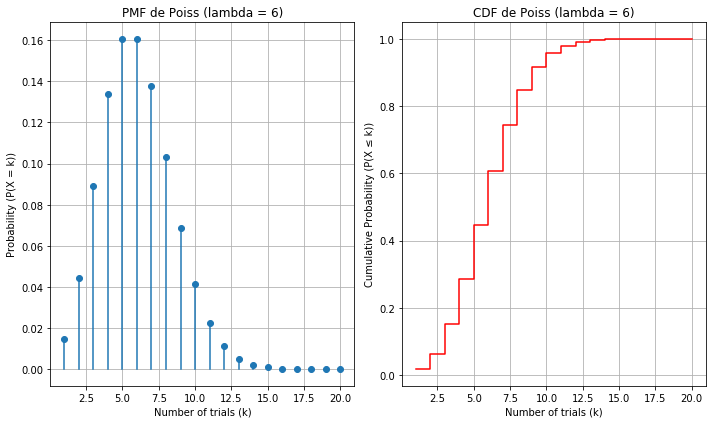

In [211]:
k_values = np.arange(1, 21)  # consideramos que dibujar las primeras 20 probabilidades basta

# PMF
pmf_values = X.pmf(k_values)

# CDF
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(10, 6))

# Plot PMF
plt.subplot(1, 2, 1) ## 1 fila, 2 columnas, primer elemento de la fila
plt.stem(k_values, pmf_values, basefmt=" ")
plt.title("PMF de Poiss (lambda = 6)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2) ## 1 fila, 2 columnas, segundo elemento de la fila
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title("CDF de Poiss (lambda = 6)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Mostramos todo
plt.tight_layout()
plt.show()

Se sabe que si $X\sim {\rm Pois}(\lambda)$, entonces $E(X)=\lambda$ y $V(X)=\lambda$. Veamos que esto es así (aquí $\lambda=6$)

In [212]:
[X.mean(),X.var()]

[6.0, 6.0]

<font color='magenta'> <strong> 16. Suponiendo que las denuncias que realizan los trabajadores de cierta empresa a
la Inspección de Trabajo tienen una media 1.5 al año. Sea 
    
    X = ‘Número de denuncias al año’. 
    
Analiza la variable. Calcula la probabilidad de que en un año dado se produzcan más de 4 denuncias  </strong> </font>


<h3> Solución. </h3>

<font color='magenta'> <strong> 17.El promedio de llamadas por minuto en una centralita es 3. Sea 
    
    X = ‘Número de llamadas en un minuto’. 
    
Calcula la probabilidad de que en el siguiente minuto no recibamos ninguna llamada.  </strong> </font>


<h3> Solución. </h3>

<font color='magenta'> <strong> 18. El número medio de robos con violencia que se registra en una barrio marginal es de 4 al mes. 
    
Calcula la probabilidad de que haya entre 2 y 6, (ambos incluidos)  en un mes
dado.  </strong> </font>


<h3> Solución. </h3>

<font color='blue'> <strong> 19. El tiempo medio entre la llegada de una persona a otra en una cola de espera es 5 segundos. Sea 
    
    X = ‘Tiempo de llegada de una persona a la cola’. 
    
Analiza la
variable. Calcular la probabilidad de que después de la llegada de una persona se
tarde más de 10 segundos hasta la siguiente llegada.  </strong> </font>




<h3> Solución. </h3> 

En este caso estamos ante un modelo exponencial, $X\sim {\rm Exp}(\lambda)$, pues mide el tiempo transcurrido entre la llegada de dos personas a una cola y el número de personas que llegan a la cola en un intervalo de tiempo dado es una variable de Poisson. Como $E(X)=\frac{1}{\lambda}=5$, sabemos que $\lambda=\frac{1}{5}$. 

La probabilidad que nos piden es 
\begin{eqnarray*}
    P(X>10)&=& 1-P(X\leq 10)\\
    &=& 1-\int_0^{10} \frac{1}{5}\exp(-\frac{1}{5}t)dt\\
    &=& 1-\left(\left.-\exp(-\frac{1}{5}t)\right]_0^{10}\right)\\
    &=& 1-(-\exp(-\frac{1}{5}10)+ 1)\\
    &=& \exp(-2)\\
\end{eqnarray*}
    

In [213]:
from scipy.stats import expon
import matplotlib.pyplot as plt

L=1/5

# La distribución tiene media 1/lambda y en Python se usa la media para definirla:

X = expon(scale=1/L)   # Exponential Distribution

In [214]:
X.mean()

5.0

In [215]:
X.var()

25.0

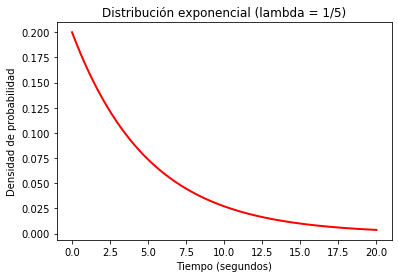

In [216]:
# Plot de la función densidad de probabilidad
x = np.linspace(0, 20, 1000)
pdf = X.pdf(x)
plt.plot(x, pdf, 'r-', lw=2)

plt.title('Distribución exponencial (lambda = 1/5)')
plt.xlabel('Tiempo (segundos)')
plt.ylabel('Densidad de probabilidad')
plt.show()

<font color='magenta'> <strong> 20. Una instalación de luz contiene varios focos conectados y se sabe que en media
se rompen 10 focos cada día (24 horas). Sea 

    X = ’Duración de un foco en horas’.


Analiza la variable. Hallar la probabilidad de que el primer foco dure más de 100
horas.  </strong> </font>


<h3> Solución. </h3>

<font color='magenta'> <strong> 21. La duración media de un modelo de marcapasos es de 7 años. Sea 

    X = ’Duración de un marcapasos’. 
    
Analiza la variable. ¿Cuál es la probabilidad de que dure al
menos 5 años? ¿y menos de 3?  </strong> </font>


<h3> Solución. </h3>

<font color='magenta'> <strong> 22. El tiempo medio en servir una mercancía es 5 días. Sea 
    
    X = ’Tiempo en servir una mercancía’. 
  
Analiza la variable. ¿Cuál es la probabilidad de que un cliente tenga que esperar al menos 6 días para recibirla?  </strong> </font>


<h3> Solución. </h3>

<font color='blue'> <strong> 23. Nos interesa el número de reclamaciones que se reciben al mes. Sabemos que, en media, son 10 reclamaciones. 

* Analiza la variable (tipo de variable, dibuja las funciones de densidad y probabilidad y calcula media y desviación típica). Calcula la probabilidad de que al menos uno de los dos próximos meses reciba más de 22 reclamaciones.
* Un mes se considera bueno si es del $20\%$ de meses que recibe menos reclamaciones. Calcula el número de reclamaciones por debajo del cual se considera que un mes es bueno.
* Por lo anterior, la probabilidad de que un mes sea bueno es del $20\%$. ¿Cuál es el número de meses buenos que esperamos tener al año? ¿Cuál es la probabilidad de que haya menos de 3 meses buenos? Calcula la probabilidad de que haya un mes bueno antes de tres meses.
  </strong> </font>


<h3> Solución. </h3>

Sea

$$X=\text{Número de reclamaciones que se reciben al mes.}$$

Evidentemente, se trata de una v.a. de Poisson. De hecho, 

$$X\sim {\rm Pois}(10)$$ 

pues sabemos que $E(X)=10$. 




In [217]:
L=10
from scipy.stats import poisson
X=poisson(L)
X.mean()

10.0

In [218]:
X.var()

10.0

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


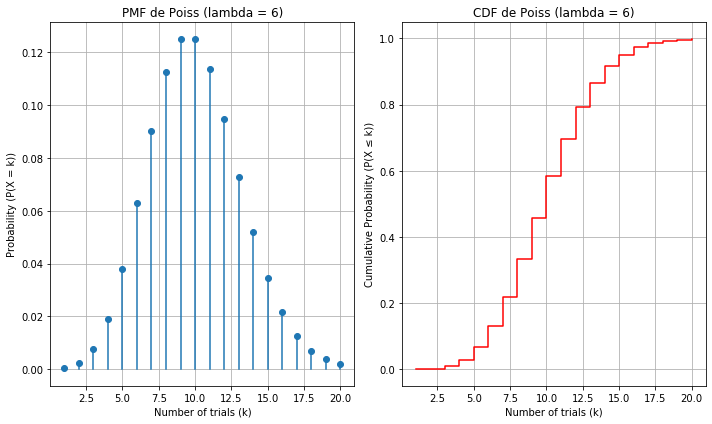

In [219]:
k_values = np.arange(1, 21)  # consideramos que dibujar las primeras 20 probabilidades basta

# PMF
pmf_values = X.pmf(k_values)

# CDF
cdf_values = X.cdf(k_values)

# Plot PMF
plt.figure(figsize=(10, 6))

# Plot PMF
plt.subplot(1, 2, 1) ## 1 fila, 2 columnas, primer elemento de la fila
plt.stem(k_values, pmf_values, basefmt=" ")
plt.title("PMF de Poiss (lambda = 6)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Probability (P(X = k))")
plt.grid(True)

# Plot CDF
plt.subplot(1, 2, 2) ## 1 fila, 2 columnas, segundo elemento de la fila
plt.step(k_values, cdf_values, where='post', color='r', linestyle='-')
plt.title("CDF de Poiss (lambda = 6)")
plt.xlabel("Number of trials (k)")
plt.ylabel("Cumulative Probability (P(X ≤ k))")
plt.grid(True)

# Mostramos todo
plt.tight_layout()
plt.show()

Para calcular la probabilidad de que al menos uno de los dos próximos meses se reciban más de 22 reclamaciones, definimos las v.a. $Y_1,Y_2$ que valen el número de reclamaciones recibidas el primer y el segundo mes, respectivamente. Estas v.a. son independientes y ambas siguen el mismo modelo: 

$$Y_1,Y_1\sim \operatorname{Pois}(10).$$ 

Queremos calcular 

\begin{eqnarray*}
    P(\{Y_1>22\}\cup \{Y_2>22\}) &=& P(\{Y_1>22\})+P(\{Y_2>22\})-P(\{Y_1>22\}\cap \{Y_2>22\})\\
    &=& P(\{Y_1>22\})+P(\{Y_2>22\})-P(\{Y_1>22\})P(\{Y_2>22\})\\
    &=& 2p-p^2,
\end{eqnarray*}

donde 

$$p=P(\{Y_1>22\})=P(\{X>22\})=1-P(X\leq 22)=1-F(22)$$

In [220]:
p=1-X.cdf(22)
solucion=2*p-p**2
solucion

0.000591386155752585

Respondemos ahora al siguiente item: 

<font color='blue'> <strong> Un mes se considera bueno si es del $20\%$ de meses que recibe menos reclamaciones. Calcula el número de reclamaciones por debajo del cual se considera que un mes es bueno. </strong></font> 

Lo que se está diciendo es que $P(\text{mes bueno})=0.2$ y que hay un número $a$ de reclamaciones tal que 

$$\{\text{mes bueno}\} \longleftrightarrow X\leq a$$ 

y nos piden el valor de $a$. Ahora bien, la definición de $a$ y de la función de distribución $F$ de la v.a. $X$ nos lleva a afirmar que:

$$F(a)=P(X\leq a)=0.2$$

Es decir, tenemos que resolver la ecuación $F(a)=0.2$. Como los valores $a$ se restringen a enteros, la ecuación podría no tener solución exacta y, en tal caso, debemos decidir qué valor $a$ entre los que más se aproximan a resolver la ecuación es aceptable. De hecho, es lo que sucede precisamente en nuestro ejemplo:

In [221]:
0.2 - X.cdf(np.arange(0, 11))

array([ 0.1999546 ,  0.1995006 ,  0.1972306 ,  0.18966395,  0.17074731,
        0.13291404,  0.06985858, -0.02022065, -0.13281968, -0.25792971,
       -0.38303975])

Podemos concluir que $a=7$. Otra forma (menos pedestre) de abordar este cálculo es la siguiente:

In [222]:
import numpy as np
from scipy.optimize import brentq

def percentil(p):
    # resuelve F(x) - p = 0 en el intervalo [0,20]
    return brentq(lambda x: X.cdf(x) - p, 0, 20)

# Versión vectorizada
percentil_vec = np.vectorize(percentil)

# Ejemplo: percentil del 20%
print(percentil_vec(0.2))

7.000000000000032




<font color= 'brown'> <strong> Nota: </strong> brentq implementa el **método de Brent**, un algoritmo híbrido que combina:

* el **método de la bisección** (seguro),
* el **método de la secante** (rápido),
* la **interpolación cuadrática inversa** (más rápida aún),

para obtener una raíz de forma:

* **rápida**,
* **robusta**,
* con **convergencia garantizada** si $f(a)\cdot f(b) < 0$ </font>



En efecto, volvemos a obtener $a=7$. 

Respondemos ahora al último item: 

<font color='blue'> <strong> ¿Cuál es el número de meses buenos que esperamos tener al año? ¿Cuál es la probabilidad de que haya menos de 3 meses buenos? Calcula la probabilidad de que haya un mes bueno antes de tres meses.</strong> </font>

Si hemos tomado $a=7$, entonces 

$$P(\text{mes bueno})=F(7)= 0.2202206.$$

La variable 

$$Y=\text{Número de meses buenos al año}$$ 

será una binomial $Y\sim {\rm Bin}(12,F(7))$ y la probabilidad de menos de tres meses buenos es 

\begin{eqnarray*}
    P(Y\leq 2)&=& P(Y=0)+P(Y=1)+P(Y=2)\\
    &=& \binom{12}{0}F(7)^0(1-F(7))^{12}+\binom{12}{1}F(7)^1(1-F(7))^{11}+\binom{12}{2}F(7)^2(1-F(7))^{10}\\
    &=& (1-F(7))^{12}+12F(7)^1(1-F(7))^{11}+\binom{12}{2}F(7)^2(1-F(7))^{10}
\end{eqnarray*}

In [223]:
q=X.cdf(7)
print(q)
from scipy.stats import binom
Y=binom(12,q)
print(Y.cdf(2))

0.22022064660169907
0.48789013496628897


Por otra parte, si consideramos la v.a.

$$Z=\text{Número de meses buenos en un periodo de tres meses}$$ 

será una binomial

$$Z\sim {\rm Bin}(3,q)= \operatorname{Bin}(3,0.22022064660169907)$$

y la probabilidad de que haya un mes bueno antes de tres meses es 

$$P(Z\geq 1)=1-P(Z=0)=1-\binom{3}{0}q^0(1-q)^{3}$$

In [224]:
Z=binom(3,q)
print(1-Z.cdf(0))

0.5258506102654439


<font color='magenta'> <strong> 24. En una empresa hay, en media, 30 bajas laborales al mes. Sea 
    
    
$$X = \text{‘número de bajas el próximo mes’}.$$

* Calcula a $P(28 < X < 35)$
    
* Un mes se considera bueno si es del 10$\%$ en que hay menos bajas y malo si es del 20$\%$ en que hay más bajas. ¿A partir de qué números de bajas, a y b, se considera que un mes es bueno o malo?
    \item Si examinamos un año (12 meses) ¿en cuántos esperamos que haya menos de 26 bajas? (calcular primero la probabilidad de que haya menos de 26 bajas)

</strong></font>

<h3> Solución. </h3> 


<font color='blue'> <strong> 25. Se tiene un conjunto ordenadores del que se observa que el 2$\%$ tiene algún problema (es defectuoso).

* Los ordenadores se meten en lotes de 1000 ordenadores. Un lote se considera malo si es del 10$\%$ de los lotes que contienen más ordenadores defectuosos y bueno si es del 5$\%$ de los que contienen menos. Un lote que no sea bueno ni malo se considera standard ¿Entre qué valores debe estar el número de ordenadores defectuosos de un lote para que sea considerado standard?
    
* Una unidad de control examina los lotes para detectar aquellos que son malos. Dicha unidad detecta 12 lotes defectuosos al día. Si realizamos el control dos días seguidos ¿cuál es la probabilidad de que al menos uno de esos días encontremos más de 13 lotes defectuosos?
    
* ¿Cuánto tiempo esperamos que pase antes de encontrar un lote defectuoso? ¿Cuál es la probabilidad de que esto ocurra en un intervalo de entre 1 y 4 horas?

</strong></font>

<h3> Solución. </h3> 


 Por hipótesis, sabemos que la probabilidad de que un ordenador sea defectuoso es $0.02$. Por tanto, cuando miramos un lote de 1000 ordenadores y contamos la cantidad $X$ de unidades defectuosas, tenemos que 
 
 $$X\sim {\rm Binom}(1000,0.02).$$ 
 
Entonces, buscamos $a,b$ tales que:

$$\text{Lote malo} \Leftrightarrow \{X\leq a\} \Leftrightarrow P(\{X\leq a\})=0.1$$ 

$$\text{Lote bueno} \Leftrightarrow \{X\geq b\} \Leftrightarrow P(\{X\geq b\})=0.05$$

(Un lote es estándar si no es malo ni bueno). 

Es decir, $a,b$ se computan como percentiles.

In [225]:
from scipy.stats import binom

X=binom(1000,0.02)

a = X.ppf(0.1)
b = X.ppf(0.95)

[a,b]

[14.0, 28.0]

Respondemos ahora el siguiente item: <font color='blue'> <strong> Una unidad de control examina los lotes para detectar aquellos que son malos. Dicha unidad detecta 12 lotes defectuosos al día. Si realizamos el control dos días seguidos ¿cuál es la probabilidad de que al menos uno de esos días encontremos más de 13 lotes defectuosos?</strong> </font> 

La variable 

$$Y=\text{ Número de lotes defectuosos detectados en un día}$$

sigue el modelo de Poisson con parámetro $$\lambda=12$$ 

(Eso es lo que significa que detecta 12 lotes defectuosos al día: se refiere a un promedio. Hay días que detecta más, y otros, menos). 

Por tanto, si $Y_1,Y_2$ son las v.a. que informan del número de lotes defectuosos detectados en el primer y el segundo día, respectivamente, sabemos que: $Y_1,Y_2$ son v.a. independientes y  

$$Y_1,Y_2\sim {\rm Pois}(12).$$ 

Nos piden

\begin{eqnarray*}
    P(\{Y_1>13\}\cup \{Y_2>13\}) &=& P(Y_1>13)+P(Y_2>13)-P(\{Y_1>13\}\cap \{Y_2>13\}) \\ 
    &=& P(Y_1>13)+P(Y_2>13)-P(Y_1>13)P(Y_2>13)\\
    &=& 2p-p^2,
\end{eqnarray*}

donde  (denotando por $F$ la función de distribución de la v.a. $Y$) 

$$p=P(Y>13)=1-P(Y\leq 13)=1-F(13)$$

Ahora bien, calculemos los valores de la f.d.p. f que nos interesan para resolver el problema:

In [226]:
from scipy.stats import poisson

X=poisson(12)

p=1-X.cdf(13)

print(p)

print(f"La probabilidad pedida es {2*p - p**2}")


0.31846436787975374
La probabilidad pedida es 0.5355091821504564


Respondemos ahora el último item: <font color='blue'> <strong> ¿Cuánto tiempo esperamos que pase antes de encontrar un lote defectuoso? ¿Cuál es la probabilidad de que esto ocurra en un intervalo de entre 1 y 4 horas? </strong></font> 

En este caso la variable a considerar es de tipo exponencial con parámetro $\lambda=12$:

$$Z=\text{Tiempo transcurrido hasta encontrar un lote defectuoso}; Z\sim {\rm Exp}(12)$$

Sabemos que 

$$E(Z)=\frac{1}{\lambda}=1/12,$$ 

pero esta cantidad está referida a la unidad temporal $t=1$ dia. Por tanto, si medimos en horas, el tiempo esperado hasta el primer lote defectuoso es $1/12\cdot 24=2$ horas. Para responder a la última pregunta basta notar que $1$hora es $1/24$ días, por lo que nos piden 

$$P(\frac{1}{24}\leq Z\leq \frac{4}{24})=\int_{\frac{1}{24}}^{\frac{1}{8}} 12\exp(-12t)dt$$ 

In [227]:
import numpy as np
from scipy.integrate import quad

# Definimos la función
def f(x):
    return 12 * np.exp(-12 * x)

# Integramos en el intervalo [1/24, 1/8]
resultado, error = quad(f, 1/24, 1/8)

print("Resultado =", resultado)


Resultado = 0.3834004995642037


In [228]:
from scipy.stats import expon

X = expon(loc=0, scale=1/12)

p=X.cdf(1/8)-X.cdf(1/24)

print(f"La probabilidad pedida es {p}")

La probabilidad pedida es 0.38340049956420363


 <font color='magenta'> <strong> 26. Recibimos cajas de componentes de dos empresas. Cada caja contiene 100 componentes. La Empresa I nos informa de que su porcentaje de componentes defectuosos es del 2$\%$. Por su parte la Empresa II nos informa de que ellos paran la producción cada vez que encuentran un componente defectuoso y que, en media, encuentran 16 componentes correctos antes de encontrar un defectuoso. 
    
    Sabiendo que compramos el 40$\%$ de las cajas a la Empresa I y el resto a la Empresa II.

* Calcula la probabilidad de que una caja contenga más de 4 componentes defectuosos.
*  Si esto ocurre, calcula la probabilidad de que esa caja venga de la empresa II.
 </strong></font> 
 
 <h3> Solución. </h3>
    

<font color='blue'> <strong> 27. En una fábrica se fabrican dos tipos de camiones (tipos I y II). La capacidad de carga de cada tipo de camión es una normal con medias 100 y 120 y desviaciones típicas 2 y 3, respectivamente.

    
* Una empresa compra dos camiones del primer tipo y tres del segundo. Calcula la probabilidad de que, en total, los camiones comprados puedan llevar una carga que sea menor o igual que 562
* Si compro un camión y su capacidad de carga es de 110 ¿cuál es la probabilidad de que sea un camión de tipo I? <font color='brown'> (téngase en cuenta que asumimos un margen de error de 1kg en la capacidad de carga).</font> 

 </strong></font> 

<h3> Solución.</h3>

Comenzamos con el primer apartado. Tenemos que considerar una v.a. del tipo:
    
$$Z=X_1+X_2+X_3+Y_1+Y_2$$

donde todas las v.a. $X_i,Y_j$ son independientes unas de otras, $X_i\sim N(100,2)$ para $i=1,2,3$, y $Y_j\sim N(120,3)$, $j=1,2$. 
Entonces $Z$ será de nuevo una v.a. normal. Su media es 

$$E(Z)=100+100+100+120+120=540$$ 

y su desviación típica es: 

$$\sigma=\sqrt{V(Z)}=\sqrt{4+4+4+9+9}=\sqrt{30}$$

Por tanto, 

$$Z\sim N(540,\sqrt{30})$$ 

y nos piden $P(Z\leq 562)$:

In [229]:
from scipy.stats import norm

Z=norm(540,30**0.5)

p=Z.cdf(562)

print(f"La probabilidad pedida es {p}")

La probabilidad pedida es 0.999970482109752


Vamos con el segundo apartado del ejercicio. Como no nos dicen nada sobre la probabilidad de elegir, al realizar la compra, camiones del tipo I o II, vamos a asumir que ambas son a priori iguales. Teniendo en cuenta lo que se afirma sobre el error de medición de la carga, entendemos que hemos comprado un camión y su capacidad de carga está entre 109 y 111. Compramos un camión en la fábrica y consideramos la v.a. 

$$C=\text{capacidad de carga del camión}.$$  

Nos piden:

$$P(\text{ el camión es de tipo I}|109\leq C \leq 111)=\frac{P(109\leq C\leq 111| \text{camión tipo I})P(\text{camión tipo I})}{P(109\leq C\leq 111)}$$


Ahora bien, cuando el camión es de tipo I, $C\sim X\sim N(100,2)$ 

Y cuando el camión es de tipo II, $C\sim Y\sim N(120,3)$. Además, 

$$P(\text{camión tipo I})=P(\text{camión tipo II})=\frac{1}{2}$$

y 

\begin{eqnarray*}
P(109\leq C\leq 111) 
&=& P(109\leq C\leq 111| \text{camión tipo I})P(\text{camión tipo I}) \\ 
&\ & \quad \quad +P(109\leq C\leq 111| \text{camión tipo II})P(\text{camión tipo II}) \\
&=& P(109\leq X\leq 111)\frac{1}{2}+P(109\leq Y\leq 111)\frac{1}{2}
\end{eqnarray*}

Por tanto,

$$P(\text{ el camión es de tipo I}|109\leq C \leq 111)=\frac{P(109\leq X\leq 111)\frac{1}{2}}{P(109\leq X\leq 111)\frac{1}{2}+P(109\leq Y\leq 111)\frac{1}{2}}$$




In [230]:
from scipy.stats import norm

X=norm(100,2)

Y=norm(120,3)

prob = 0.5*(X.cdf(111)-X.cdf(109))/(0.5*(X.cdf(111)-X.cdf(109))+ 0.5*(Y.cdf(111)-Y.cdf(109)))

print(f"La probabilidad pedida es {prob}")

La probabilidad pedida es 0.0027459811519679697


Si nos hubieran preguntado la probabilidad de que el camión sea del tipo II sabiendo que su carga maxima está entre 109 y 111, habríamos obtenido:

$$P(\text{ el camión es de tipo II}|109\leq C \leq 111)=\frac{P(109\leq Y\leq 111)\frac{1}{2}}{P(109\leq Y\leq 111)\frac{1}{2}+P(109\leq X\leq 111)\frac{1}{2}}$$

In [231]:
prob2 = 0.5*(Y.cdf(111)-Y.cdf(109))/(0.5*(Y.cdf(111)-Y.cdf(109))+ 0.5*(X.cdf(111)-X.cdf(109)))

print(f"La probabilidad pedida es {prob2}")

La probabilidad pedida es 0.997254018848032


<strong> Posible explicación de los resultados obtenidos:</strong>  

Aunque 110 está a la misma distancia de 100 que de 120, la desviación típica de Y, que es 3, es mucho mayor que la de X, que es 2 ($10=5\cdot 2$ y $10=3.3333...\cdot 3$). Por eso la v.a. Y es mucho más probable, dado que $109\leq C\leq 111$. Es más si la desviación típica hubiera sido la misma para ambas distribuciones, tendríamos 

$$P(109\leq X\leq 111)=P(109\leq Y\leq 111)$$ 

y la probabilidad daria exactamente 0.5). 

Supongamos, por otra parte, que la información que tenemos es que la carga máxima del camión está en $[104,105]$. El cálculo anterior, adaptado a esta nueva circunstancia, daría, para 

$$P(\text{ el camión es de tipo I}|104\leq C \leq 105)$$

In [232]:
prob3 = 0.5*(X.cdf(105)-X.cdf(104))/(0.5*(X.cdf(105)-X.cdf(104))+ 0.5*(Y.cdf(105)-Y.cdf(104)))

print(f"La probabilidad pedida es {prob3}")

La probabilidad pedida es 0.9999855847415602


Y para:  

$$P(\text{ el camión es de tipo II}|104\leq C \leq 105)$$

In [233]:
prob4 = 0.5*(Y.cdf(105)-Y.cdf(104))/(0.5*(Y.cdf(105)-Y.cdf(104))+ 0.5*(X.cdf(105)-X.cdf(104)))

print(f"La probabilidad pedida es {prob4}")

La probabilidad pedida es 1.4415258439683665e-05


lo cual nos reafirma en la explicación anterior en términos de las desviaciones típicas, pues $105-100=5= 2.5\cdot 2$, mientras que $120-105=15=5\cdot 3$ (y $2.5$ es mucho menor que $5$).  


<strong> Nota adicional:</strong>  Si asumimos que la carga es exactamente un  número concreto, por ejemplo $C=108$, entonces no podemos hacer las cuentas anteriores porque $P(C=108)=0$ y estaríamos dividiendo por $0$. Pero podemos hacer el cálculo para $108-\varepsilon <C<108+\varepsilon$ y luego hacer $\varepsilon\to 0$. Podemos dibujar lo que pasa en ese caso concreto:

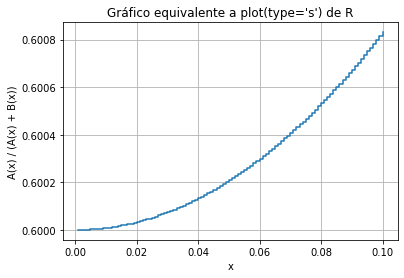

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definimos A y B como en R
def A(x):
    return norm.cdf(108 + x, loc=100, scale=2) - norm.cdf(108 - x, loc=100, scale=2)

def B(x):
    return norm.cdf(108 + x, loc=120, scale=3) - norm.cdf(108 - x, loc=120, scale=3)

# Vectorizar para aceptar arrays como en R
A = np.vectorize(A)
B = np.vectorize(B)

# Variable auxiliar
x = np.arange(1, 101) * 0.001

# Función a graficar
y = A(x) / (A(x) + B(x))

# Plot tipo "step" (similar a type="s" en R)
plt.step(x, y, where='post')
plt.xlabel("x")
plt.ylabel("A(x) / (A(x) + B(x))")
plt.title("Gráfico equivalente a plot(type='s') de R")
plt.grid(True)
plt.show()


Es decir, $C=108$ nos da información suficiente para afirmar que la probabilidad de que el camión elegido sea de tipo I es del 60$\%$:

$$P(\text{ el camión es de tipo I}| C=108)=0.6.$$

<font color='magenta'> <strong> 28. Dos empresas fabrican cajas con pesos que siguen distribuciones normales. La primera empresa con media 8 y desviación típica 1 y la segunda con media 7 y desviación típica 2.

* Si cojo dos cajas de la primera empresa y una de la segunda ¿cuál es la probabilidad de que el peso total esté entre 22 y 24?
* Una empresa que fabrica cajas piensa que la distribución de los pesos de las cajas es una normal. Se sabe que un 10$\%$ de las cajas pesan más de 5 kg y otro 10$\%$ menos de 4 kg. Calcula la media y desviación típica del peso de estas cajas. 
* En una Facultad la nota de entrada de los alumnos es una variable aleatoria con media 6.3 y desviación típica 0.3. Tenemos dos clases de 80 y 60 alumnos respectivamente. Calcula la probabilidad de que la nota media de entrada de la primera clase sea menor que la de la segunda clase más 1. 
    </strong> </font> 


<h3> Solución.</h3>

<font color='magenta'> <strong>  29. El peso de los niños de un colegio es una normal con media 50 Kg y desviación
típica 2.
* Si cojo tres niños ¿cuál es la probabilidad de que su peso conjunto pase de 148 kg?
* En otro colegio piensan que la distribución de los pesos sus alumnos también será una normal. Se sabe que un 10$\%$ de los niños pesan más de 55 kg y otro 10$\%$ menos de 45 kg. Calcula la media y desviación típica del peso de estos niños
 </strong> </font> 


<h3> Solución.</h3>

<font color='blue'> <strong>  30. Se sabe que los valores que nos proporciona un determinado algoritmo siguen una
normal. Sabemos también que el 5$\%$ de las veces nos proporciona un número
menor que 1 mientras que el 7$\%$ nos da mayor que 10.
\begin{itemize}
    \item Calcula $\mu$ y $\sigma$. 
    \item ¿Cuál es la probabilidad de que la próxima vez que ejecutamos el algoritmo salga un número entre 3 y 5?
    \item Ejecutamos el algoritmo 6 veces. ¿cuál es la probabilidad de que la suma de los resultados sea menor que 20?
 </strong> </font> 


<h3> Solución.</h3>

Sea $X$ la v.a. de la que nos hablan (i.e., el valor proporcionado por el algoritmo, que se entiende tiene una componente aleatoria). Entonces $X\sim {\rm N}(\mu,\sigma)$. Lo que nos dicen es que obtengamos los valores de $\mu$ y $\sigma$ a partir de las identidades:

$$P(X\leq 1)=0.05; \quad P(X\geq 10)=0.07$$

Ahora bien, $Z=\frac{X-\mu}{\sigma}\sim N(0,1)$, por lo que podemos usar los percentiles de la v.a. $Z$. De hecho, 

$$X\leq 1 \Leftrightarrow Z= \frac{X-\mu}{\sigma}\leq \frac{1-\mu}{\sigma}$$ 

y 

$$X\geq 10 \Leftrightarrow Z= \frac{X-\mu}{\sigma}\geq \frac{10-\mu}{\sigma}$$

(pues $\sigma>0$ necesariamente). Por tanto, 

$$P(Z\leq \frac{1-\mu}{\sigma})=0.05$$

y 

$$\frac{1-\mu}{\sigma}$$ 

es el percentil del 5$\%$ de la v.a. Z. De forma similar, 

$$P(Z\geq \frac{10-\mu}{\sigma})=0.07$$

y 

$$\frac{10-\mu}{\sigma}$$ es el percentil del 93$\%$ de la v.a. Z.

In [235]:
from scipy.stats import norm
Z=norm(0,1)
a=Z.ppf(0.05)
b=Z.ppf(0.93)
[a,b]

[-1.6448536269514729, 1.475791028179171]

Es decir, para calcular $\mu,\sigma$ basta resolver el sistema de ecuaciones

$$
\left\{\begin{array}{llll} (1-\mu)/\sigma &=& -1.644854\\ (10-\mu)/\sigma &=& 1.475791 \end{array}\right.
$$

o, equivalentemente, el sistema de ecuaciones lineales:

$$
\left\{\begin{array}{llll} -1.644854 \sigma +\mu &=& 1\\ 1.475791 \sigma +\mu &=& 10 \end{array} \right.
$$

Restando la primera ecuación de la segunda, obtenemos que 

$$(1.475791+1.644854) \sigma =9$$

por lo que 

$$\sigma = 9/3.120645=2.88401917.$$ 

Por tanto, $\mu= 1+1.644854\cdot 2.88401917 = 5.74379047$.  Guardemos los resultados en Python (usamos las variables m,s para la media y la desviación típica):

In [236]:
m = 5.74379047
s = 2.88401917

Respondemos ahora al siguiente item: <font color='blue'> <strong> ¿Cuál es la probabilidad de que la próxima vez que ejecutamos el algoritmo salga un número entre 3 y 5? </strong> </font>


Sabemos que $X\sim N(m,s)$ Nos piden $p=P(3<X<5)$.

In [237]:
X=norm(m,s)
p= X.cdf(5)-X.cdf(3)
print(f"La probabilidad pedida es {p}")

La probabilidad pedida es 0.2275353537155701


Respondemos ahora al último item: font color='blue'> <strong> Ejecutamos el algoritmo 6 veces. ¿cuál es la probabilidad de que la suma de los resultados sea menor que 20?</strong> </font>



Si denotamos por $X_i$ la salida del i-ésimo resultado, tendremos que nos piden $p=P(T<20)$ donde 

$$T=X_1+\cdots X_6.$$

Claro que $T\sim N(6m,\sqrt{6s^2})$. Por tanto, el resultado es:


In [238]:
X=norm(6*m,(6*s**2)**0.5)
p= X.cdf(20)
print(f"La probabilidad pedida es {p}")

La probabilidad pedida es 0.020315380777277237


<font color='magenta'> <strong> 31. Tenemos unos datos de los que sabemos que siguen una normal con $\mu = 7$ y $\sigma =
2.5$. Cojo dos muestras de 60 datos cada una.
\begin{itemize}
*  ¿Cuál es la probabilidad de que la suma de sus medias sea mayor que 5?
*  ¿Cuál es la probabilidad de que la media de la primera sea mayor que la segunda?
*  Tengo ahora otros datos que creo que vienen de una normal. Se sabe que, para esos datos, $P(X < 10) = 0.1$, $P(X < 13) = 0.15$. Calcula su media y desviación típica.


 </strong> </font> 


<h3> Solución.</h3>